In [1]:
#注：scikit-learn中逻辑回归有四种最优化算法，通过参数solver指定
#一、小数据集用liblinear（坐标下降法）
#二、大数据集用lbfgs、 sag或 newton-cg
#三、超大数据集用sag

In [3]:
#注：scikit-learn中可通过参数penalty指定正则化范数l1或l2
#l1倾向于使参数变为0，能产生稀疏解
#如果数据维度较高，采用l1范数较好

In [28]:
#最大迭代次数可由参数max_iter指定
#多类分类可由multi_class参数指定分类方式：multinomial或ovr

In [32]:
from sklearn.datasets import make_blobs
centers = [[-5,0],[0,1.5],[5,-1]]
X,y = make_blobs(n_samples = 1000,centers = centers,random_state = 40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X,transformation)

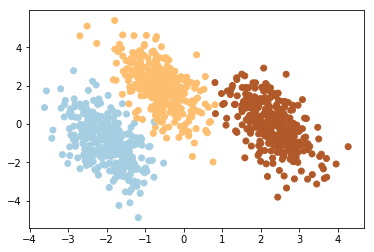

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:,0],X[:,1],c = y,cmap = plt.cm.Paired)
plt.show()

the training score is: 0.995(multinomial)


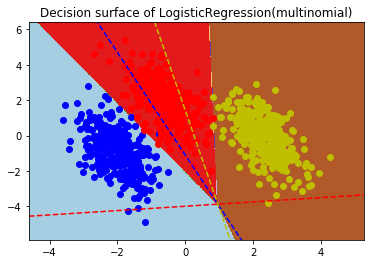

the training score is: 0.976(ovr)


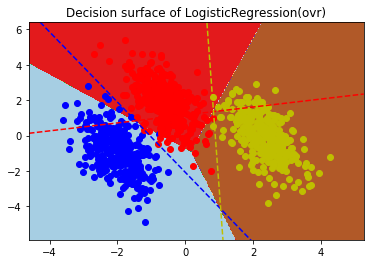

In [55]:
for multi_class in ['multinomial','ovr']:
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(solver = 'sag',max_iter = 100,random_state = 42,multi_class = multi_class)
    clf.fit(X,y)
    print('the training score is: %.3f(%s)' %(clf.score(X,y),multi_class))
    X1_min,X1_max = X[:,0].min()-1,X[:,0].max()+1
    X2_min,X2_max = X[:,1].min()-1,X[:,1].max()+1
    import numpy as np
    mesh_step = 0.02
    xx,yy = np.meshgrid(np.arange(X1_min,X1_max,mesh_step),np.arange(X2_min,X2_max,mesh_step))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
#     plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Paired)
    plt.contourf(xx,yy,Z,cmap = plt.cm.Paired)
    plt.title('Decision surface of LogisticRegression({})'.format(multi_class))
    plt.axis('tight')
    colors = 'bry'
    for label,color in zip(clf.classes_,colors):
        index = np.where(y == label)
        plt.scatter(X[index,0],X[index,1],c = color)
    xmin,xmax = plt.xlim()
    ymin,ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_
    def plot_hyperplane(label,color):
        def line(x):
            return (-x*coef[label,0]-intercept[label])/coef[label,1]
        plt.plot([xmin,xmax],[line(xmin),line(xmax)],ls = '--',color = color)
    for label,color in zip(clf.classes_,colors):
        plot_hyperplane(label,color)
    plt.show()

In [50]:
#注：
#一、plt.scatter参数中，c为点的颜色或是一个序列（如类别序列），cmap为当c为序列时，不同类对应颜色。
#二、plt.pcolormesh和plt.contourf参数中，Z是对应X,Y形状的数组，取不同的类，cmap为与Z对应的颜色序列，常设为plt.cm.Paired